In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, ParameterGrid, GridSearchCV
from sklearn.metrics import cohen_kappa_score as chs, classification_report, make_scorer, r2_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from mord import LogisticAT
from scipy.stats import spearmanr, kendalltau
import tensorflow as tf
import xgboost as xgb
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data/preprocessed_data.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df

,word,f1,f2,f3,f4,f5,f6,f7,number_of_letters,chatgpt_score_encoded,fasttext_A_sim,fasttext_B_sim,fasttext_C_sim,score_encoded
0,прагматикалық,0,0,0,8,0,116,0,13,4,0.245056,0.343533,0.348651,3
1,археологиялық,103,10,0,3,0,28,0,13,4,0.311971,0.369599,0.315624,3
2,думан,100,0,6,10,7,14,3,5,2,0.350175,0.371274,0.295582,2
3,графика,89,1,0,13,1,54,0,7,2,0.232166,0.242722,0.273367,3
4,небәрі,27,1,5,21,7,79,0,6,2,0.344129,0.267874,0.243401,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,жұмыскер,11,10,10,4,2,27,0,8,3,0.371985,0.364102,0.274501,1
1001,алды (алд),175,7,337,18,29,0,33,10,3,0.532238,0.562550,0.534421,1
1002,үміт,365,9,96,100,76,533,3,4,0,0.326001,0.404425,0.327951,1
1003,құндылық,209,134,0,150,0,589,5,8,3,0.354230,0.425133,0.332415,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   word                   1005 non-null   object 
 1   f1                     1005 non-null   int64  
 2   f2                     1005 non-null   int64  
 3   f3                     1005 non-null   int64  
 4   f4                     1005 non-null   int64  
 5   f5                     1005 non-null   int64  
 6   f6                     1005 non-null   int64  
 7   f7                     1005 non-null   int64  
 8   number_of_letters      1005 non-null   int64  
 9   chatgpt_score_encoded  1005 non-null   int64  
 10  fasttext_A_sim         1005 non-null   float64
 11  fasttext_B_sim         1005 non-null   float64
 12  fasttext_C_sim         1005 non-null   float64
 13  score_encoded          1005 non-null   int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 110.1+

In [4]:
df.describe()

,f1,f2,f3,f4,f5,f6,f7,number_of_letters,chatgpt_score_encoded,fasttext_A_sim,fasttext_B_sim,fasttext_C_sim,score_encoded
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,863.253731,213.009950,223.834826,249.671642,161.145274,1183.627861,14.583085,5.731343,1.644776,0.341830,0.349268,0.314640,1.537313
std,2199.127340,777.467675,752.498671,714.298085,567.065831,3163.886972,46.490438,2.283987,1.169919,0.088116,0.100418,0.104290,1.172328
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-0.104837,-0.166775,-0.126027,0.000000
25%,31.000000,0.000000,2.000000,6.000000,1.000000,30.000000,0.000000,4.000000,0.000000,0.289485,0.300497,0.272504,1.000000
50%,93.000000,4.000000,18.000000,23.000000,9.000000,90.000000,1.000000,5.000000,2.000000,0.342739,0.359534,0.326385,1.000000
75%,609.000000,61.000000,85.000000,128.000000,47.000000,671.000000,8.000000,7.000000,2.000000,0.391153,0.410472,0.374458,2.000000
max,22475.000000,14582.000000,10036.000000,7750.000000,5521.000000,33565.000000,749.000000,18.000000,4.000000,0.637805,0.580945,0.580644,4.000000


In [5]:
df.drop(['word'], axis=1, inplace=True)

In [6]:

X_train, X_test, y_train, y_test = train_test_split(df.drop(['score_encoded'], axis=1), df.score_encoded, test_size=0.4, stratify=df.score_encoded, random_state=42)

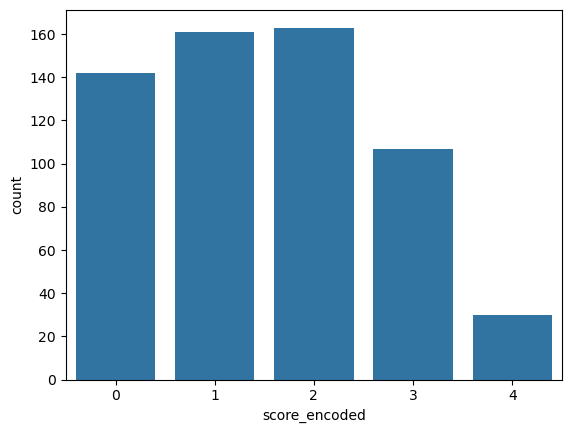

In [7]:
sns.countplot(x=y_train)
plt.show()

Imbalanced data -> SMOTE

In [8]:
oversampler = SMOTE(sampling_strategy='not majority', random_state=42)

X_train, y_train = oversampler.fit_resample(X_train, y_train)

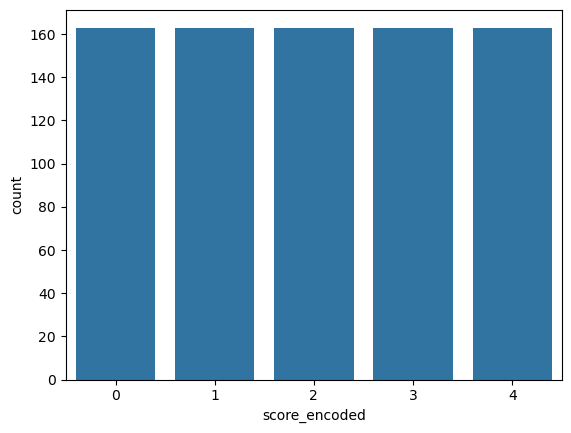

In [9]:
sns.countplot(x=y_train)
plt.show()

In [10]:
df_train = pd.DataFrame(X_train)
df_train["score_encoded"] = y_train.reset_index(drop=True)

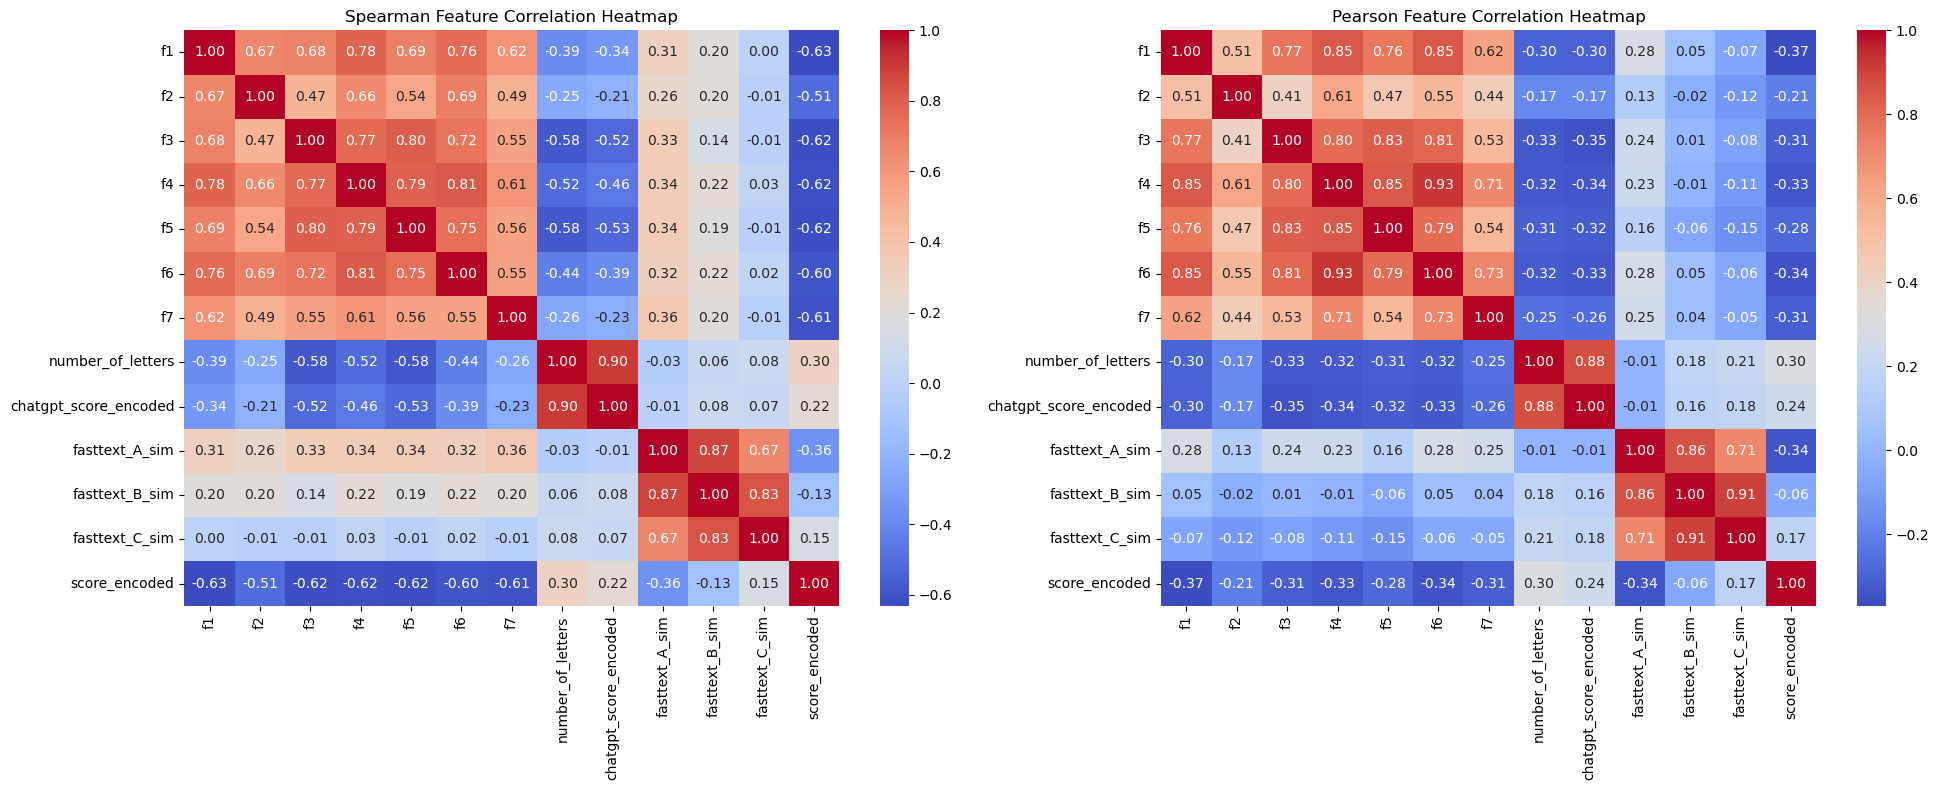

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(df_train.corr(method='spearman'), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Spearman Feature Correlation Heatmap")

sns.heatmap(df_train.corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Pearson Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

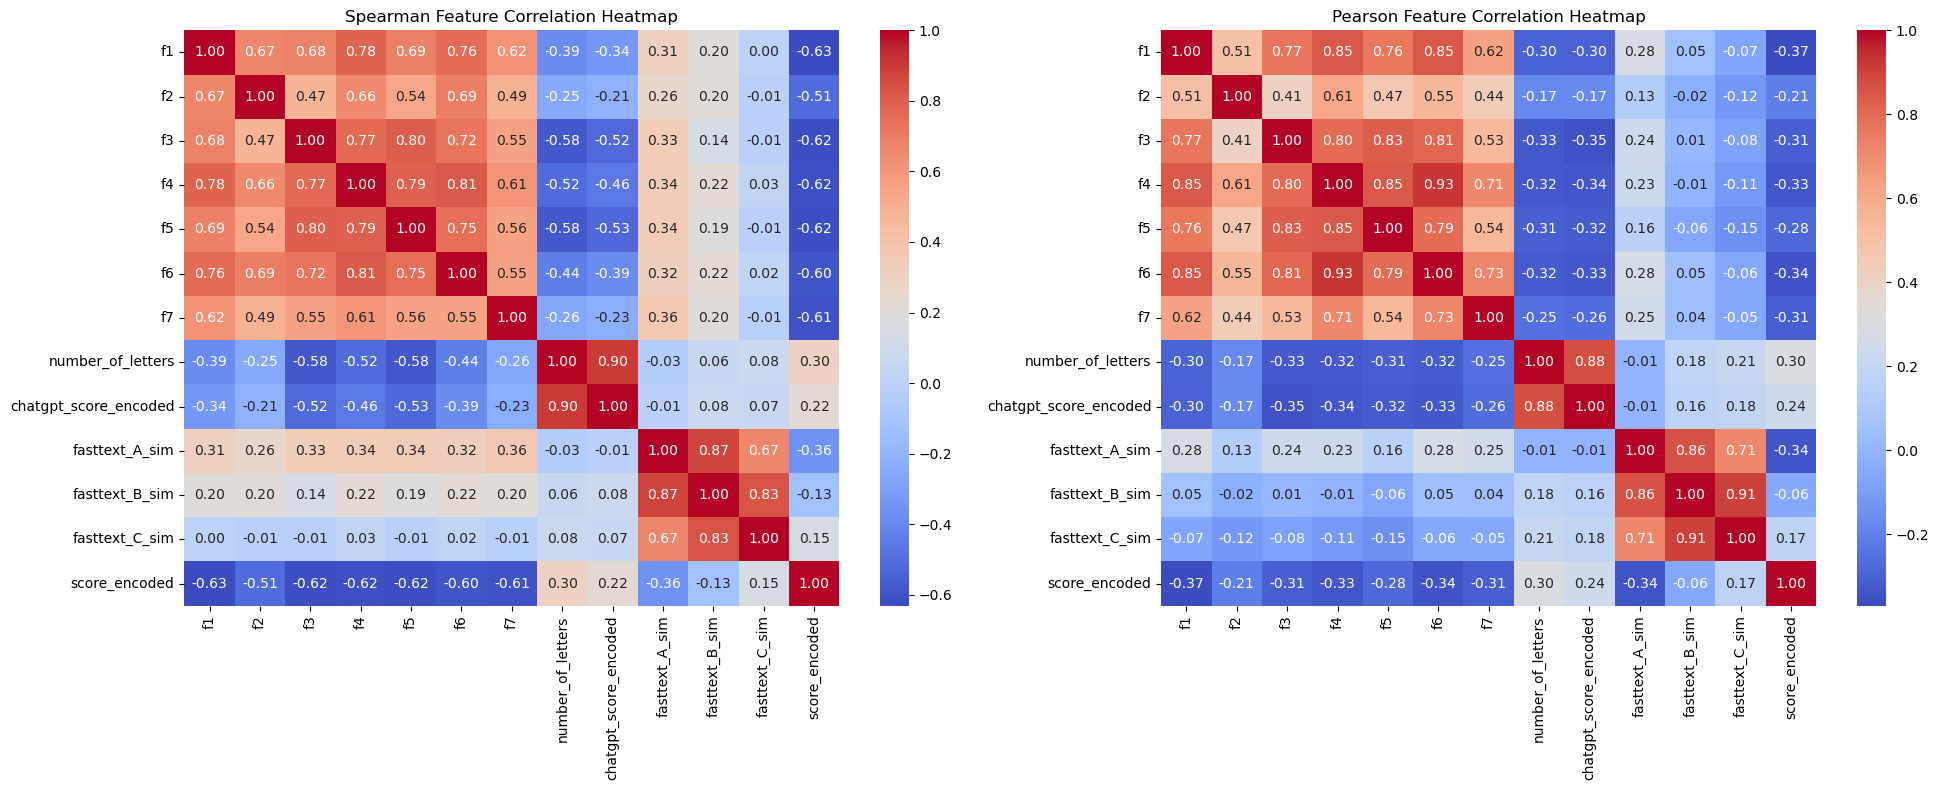

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(df_train.corr(method='spearman'), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[0])
axes[0].set_title("Spearman Feature Correlation Heatmap")

sns.heatmap(df_train.corr(method='pearson'), annot=True, cmap="coolwarm", fmt=".2f", ax=axes[1])
axes[1].set_title("Pearson Feature Correlation Heatmap")

plt.tight_layout()
plt.show()

In [13]:
df



,f1,f2,f3,f4,f5,f6,f7,number_of_letters,chatgpt_score_encoded,fasttext_A_sim,fasttext_B_sim,fasttext_C_sim,score_encoded
0,0,0,0,8,0,116,0,13,4,0.245056,0.343533,0.348651,3
1,103,10,0,3,0,28,0,13,4,0.311971,0.369599,0.315624,3
2,100,0,6,10,7,14,3,5,2,0.350175,0.371274,0.295582,2
3,89,1,0,13,1,54,0,7,2,0.232166,0.242722,0.273367,3
4,27,1,5,21,7,79,0,6,2,0.344129,0.267874,0.243401,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,11,10,10,4,2,27,0,8,3,0.371985,0.364102,0.274501,1
1001,175,7,337,18,29,0,33,10,3,0.532238,0.562550,0.534421,1
1002,365,9,96,100,76,533,3,4,0,0.326001,0.404425,0.327951,1
1003,209,134,0,150,0,589,5,8,3,0.354230,0.425133,0.332415,0


In [14]:
scalerf1 = StandardScaler()
scalerf2 = StandardScaler()
scalerf3 = StandardScaler()
scalerf4 = StandardScaler()
scalerf5 = StandardScaler()
scalerf6 = StandardScaler()
scalerf7 = StandardScaler()
scaler_number_of_letters = StandardScaler()
scalerftA = StandardScaler()
scalerftB = StandardScaler()
scalerftC = StandardScaler()

In [15]:
scalerf1.fit(pd.DataFrame(X_train.f1.tolist()))
scalerf2.fit(pd.DataFrame(X_train.f2.tolist()))
scalerf3.fit(pd.DataFrame(X_train.f3.tolist()))
scalerf4.fit(pd.DataFrame(X_train.f4.tolist()))
scalerf5.fit(pd.DataFrame(X_train.f5.tolist()))
scalerf6.fit(pd.DataFrame(X_train.f6.tolist()))
scalerf7.fit(pd.DataFrame(X_train.f7.tolist()))
scaler_number_of_letters.fit(pd.DataFrame(X_train.number_of_letters.tolist()))
scalerftA.fit(pd.DataFrame(X_train.fasttext_A_sim.tolist()))
scalerftB.fit(pd.DataFrame(X_train.fasttext_B_sim.tolist()))
scalerftC.fit(pd.DataFrame(X_train.fasttext_C_sim.tolist()))

StandardScaler()

In [16]:
X_train.f1 = scalerf1.transform(pd.DataFrame(X_train.f1)).reshape(-1)
X_train.f2 = scalerf2.transform(pd.DataFrame(X_train.f2)).reshape(-1)
X_train.f3 = scalerf3.transform(pd.DataFrame(X_train.f3)).reshape(-1)
X_train.f4 = scalerf4.transform(pd.DataFrame(X_train.f4)).reshape(-1)
X_train.f5 = scalerf5.transform(pd.DataFrame(X_train.f5)).reshape(-1)
X_train.f6 = scalerf6.transform(pd.DataFrame(X_train.f6)).reshape(-1)
X_train.f7 = scalerf7.transform(pd.DataFrame(X_train.f7)).reshape(-1)
X_train.number_of_letters = scaler_number_of_letters.transform(pd.DataFrame(X_train.number_of_letters)).reshape(-1)
X_train.fasttext_A_sim = scalerftA.transform(pd.DataFrame(X_train.fasttext_A_sim)).reshape(-1)
X_train.fasttext_B_sim = scalerftB.transform(pd.DataFrame(X_train.fasttext_B_sim)).reshape(-1)
X_train.fasttext_C_sim = scalerftC.transform(pd.DataFrame(X_train.fasttext_C_sim)).reshape(-1)

In [17]:
X_test.f1 = scalerf1.transform(pd.DataFrame(X_test.f1)).reshape(-1)
X_test.f2 = scalerf2.transform(pd.DataFrame(X_test.f2)).reshape(-1)
X_test.f3 = scalerf3.transform(pd.DataFrame(X_test.f3)).reshape(-1)
X_test.f4 = scalerf4.transform(pd.DataFrame(X_test.f4)).reshape(-1)
X_test.f5 = scalerf5.transform(pd.DataFrame(X_test.f5)).reshape(-1)
X_test.f6 = scalerf6.transform(pd.DataFrame(X_test.f6)).reshape(-1)
X_test.f7 = scalerf7.transform(pd.DataFrame(X_test.f7)).reshape(-1)
X_test.number_of_letters = scaler_number_of_letters.transform(pd.DataFrame(X_test.number_of_letters)).reshape(-1)
X_test.fasttext_A_sim = scalerftA.transform(pd.DataFrame(X_test.fasttext_A_sim)).reshape(-1)
X_test.fasttext_B_sim = scalerftB.transform(pd.DataFrame(X_test.fasttext_B_sim)).reshape(-1)
X_test.fasttext_C_sim = scalerftC.transform(pd.DataFrame(X_test.fasttext_C_sim)).reshape(-1)

LogisticAT 
OrdinalRidge
GBM
SVM

**LogisticAT:**

In [18]:
model_logistic = LogisticAT(alpha=0.7)
model_logistic.fit(X_train, y_train)

LogisticAT(alpha=0.7)

In [19]:
y_pred_train = model_logistic.predict(X_train)
y_pred_test = model_logistic.predict(X_test)

In [20]:
def weighted_mse(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
def weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

print(f'train metrics: \n{classification_report(y_train, y_pred_train)}')
print(f"Weighted MSE: {weighted_mse(y_train, y_pred_train)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_train, y_pred_train)}")

print(f'test metrics: \n{classification_report(y_test, y_pred_test)}')
print(f"Weighted MSE: {weighted_mse(y_test, y_pred_test)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_test, y_pred_test)}")
print(f"Kendal’s Tau: {weighted_kappa(y_test, y_pred_test)}")


train metrics: 
              precision    recall  f1-score   support

           0       0.73      0.52      0.61       163
           1       0.36      0.36      0.36       163
           2       0.32      0.44      0.37       163
           3       0.32      0.45      0.38       163
           4       0.71      0.37      0.49       163

    accuracy                           0.43       815
   macro avg       0.49      0.43      0.44       815
weighted avg       0.49      0.43      0.44       815

Weighted MSE: 1.0085889570552147
Cohen’s Kappa: 0.7091295116772824
test metrics: 
              precision    recall  f1-score   support

           0       0.62      0.43      0.51        95
           1       0.32      0.33      0.33       108
           2       0.38      0.44      0.41       108
           3       0.37      0.42      0.39        71
           4       0.61      0.55      0.58        20

    accuracy                           0.41       402
   macro avg       0.46      0.44

**XGBoost**

In [21]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def custom_multiclass_loss(predt, dtrain):
    """
    Custom loss function for multi-class classification.
    Computes gradient and hessian manually.
    
    Parameters:
    - predt: Raw predictions (logits) before softmax, shape (n_samples * n_classes,)
    - dtrain: DMatrix object with true labels which we do not really care. We just need to extract labels
    
    Returns:
    - grad: First derivative (gradient) of the loss function
    - hess: Second derivative (hessian) of the loss function
    """
    num_class = predt.shape[1] 
    y_true = dtrain.get_label().astype(int)  
    print(num_class)
    # Convert raw predictions to probabilities using softmax
    probs = softmax(predt)

    # Create one-hot encoding for true labels
    one_hot_labels = np.zeros_like(probs)
    one_hot_labels[np.arange(len(y_true)), y_true] = 1

    # Compute the gradient (partial derivative of loss w.r.t. raw predictions)
    grad = probs - one_hot_labels

    # Compute the hessian (second derivative)
    hess = 2.0 * probs * (1.0 - probs)

    return grad.ravel(), hess.ravel()

In [22]:
def weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def spearman_corr(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Custom scorer for GridSearchCV
kappa_scorer = make_scorer(weighted_kappa)
spearman_scorer = make_scorer(spearman_corr)

In [23]:
param_grid = {
    'max_depth': [2, 3],          # Limit tree depth
    'learning_rate': [0.05, 0.1], # Lower learning rate
    'n_estimators': [100, 150, 200],   # Moderate number of trees
    'reg_alpha': [1],        # L1 regularization
    'reg_lambda': [1],       # L2 regularization
    'subsample': [0.4, 0.8],      # Subsample training data
}
model_xgb = xgb.XGBClassifier(
    obj=custom_multiclass_loss,  
    eval_metric='mlogloss',      # Log loss for multi-class
    num_class=5,
)

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=model_xgb,
    param_grid=param_grid,
    scoring=kappa_scorer,  # Prioritize Weighted Kappa
    cv=3,  # Use 3-fold CV for small dataset
    verbose=2,
    n_jobs=-1
)

# Assuming X_train, y_train are preprocessed
grid_search.fit(X_train, y_train)

# Best model
model_xgb = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [24]:
y_pred_train = model_xgb.predict(X_train)
y_pred_test = model_xgb.predict(X_test)

In [25]:

def weighted_mse(y_true, y_pred):
    error = y_true - y_pred
    return tf.reduce_mean(tf.square(error) * tf.abs(error))

In [26]:
print(weighted_mse(y_train, y_pred_train))

tf.Tensor(0, shape=(), dtype=int64)


In [31]:
print(f'train metrics: \n{classification_report(y_train, y_pred_train)}')
print(f"Weighted MSE: {weighted_mse(y_train, y_pred_train)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_train, y_pred_train)}")
print(f"Kendal’s Tau: {weighted_kappa(y_train, y_pred_train)}")

print(f'test metrics: \n{classification_report(y_test, y_pred_test)}')
print(f"Weighted MSE: {weighted_mse(y_test, y_pred_test)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_test, y_pred_test)}")
print(f"Kendal’s Tau: {weighted_kappa(y_test, y_pred_test)}")


train metrics: 
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       163
           1       0.96      0.95      0.96       163
           2       0.94      0.90      0.92       163
           3       0.93      0.96      0.95       163
           4       0.98      1.00      0.99       163

    accuracy                           0.95       815
   macro avg       0.95      0.95      0.95       815
weighted avg       0.95      0.95      0.95       815

Weighted MSE: 0
Cohen’s Kappa: 0.9701401584399756
Kendal’s Tau: 0.9701401584399756
test metrics: 
              precision    recall  f1-score   support

           0       0.60      0.64      0.62        95
           1       0.46      0.43      0.44       108
           2       0.44      0.37      0.40       108
           3       0.42      0.51      0.46        71
           4       0.48      0.55      0.51        20

    accuracy                           0.48       402
   macro avg     

In [32]:
model_xgb.get_xgb_params()

{'objective': 'multi:softprob',
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'eval_metric': 'mlogloss',
 'gamma': None,
 'grow_policy': None,
 'interaction_constraints': None,
 'learning_rate': 0.1,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': 3,
 'max_leaves': None,
 'min_child_weight': None,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': 0.8,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None,
 'num_class': 5}

In [33]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 3,
 'n_estimators': 200,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.8}

In [34]:
print(confusion_matrix(y_train, y_pred_train))

[[157   0   4   2   0]
 [  2 155   3   3   0]
 [  5   4 147   6   1]
 [  0   2   2 156   3]
 [  0   0   0   0 163]]


In [35]:
print(confusion_matrix(y_test, y_pred_test))

[[61 21 10  1  2]
 [29 46 16 14  3]
 [10 26 40 29  3]
 [ 2  8 21 36  4]
 [ 0  0  3  6 11]]


LOSS

In [36]:
def softmax(x):
    e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return e_x / np.sum(e_x, axis=1, keepdims=True)

def custom_multiclass_loss(predt, dtrain):
    """
    Custom loss function for multi-class classification.
    Computes gradient and hessian manually.
    
    Parameters:
    - predt: Raw predictions (logits) before softmax, shape (n_samples * n_classes,)
    - dtrain: DMatrix object with true labels which we do not really care. We just need to extract labels
    
    Returns:
    - grad: First derivative (gradient) of the loss function
    - hess: Second derivative (hessian) of the loss function
    """
    print(dtrain)
    num_class = predt.shape[1] 
    y_true = dtrain.get_label().astype(int)  
    # Convert raw predictions to probabilities using softmax
    predt = predt.reshape(-1, num_class)
    probs = softmax(predt)

    # Create one-hot encoding for true labels
    one_hot_labels = np.zeros_like(probs)
    one_hot_labels[np.arange(len(y_true)), y_true] = 1

    # Compute the gradient (partial derivative of loss w.r.t. raw predictions)
    grad = probs - one_hot_labels

    # Compute the hessian (second derivative)
    hess = 2.0 * probs * (1.0 - probs)
    print(grad.shape)

    return grad.ravel(), hess.ravel()

In [37]:
def weighted_kappa(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

def spearman_corr(y_true, y_pred):
    return spearmanr(y_true, y_pred).correlation

# Custom scorer for GridSearchCV
kappa_scorer = make_scorer(weighted_kappa)
spearman_scorer = make_scorer(spearman_corr)

In [38]:
def mae_loss(y_pred, y_val):
    print(y_pred)
    print(y_val)
    grad = np.sign(y_val.reshape(-1)-y_pred)*np.repeat(1, y_val.shape[0])
    hess = np.repeat(0, y_val.shape[0])
    return grad, hess

def kappa_eval(predt, dtrain):
    # Retrieve number of classes; ensure this value matches your training parameters.
    num_class = best_params['num_class']
    
    # Reshape predictions to [n_samples, num_class]
    predt = predt.reshape(-1, num_class)
    
    # Option 1: Directly take argmax on raw logits (works if the logits are well separated)
    y_pred = np.argmax(predt, axis=1)
    
    # Option 2: (Optional) Apply softmax to get probabilities, then take argmax
    # probs = softmax(predt)
    # y_pred = np.argmax(probs, axis=1)
    
    # Get the true labels
    y_true = dtrain.get_label().astype(int)
    
    # Compute the quadratic weighted kappa
    kappa = cohen_kappa_score(y_true, y_pred, weights='quadratic')
    
    return 'kappa', kappa


In [39]:
dtrain = xgb.DMatrix(X_train, label=y_train)


best_params = {'learning_rate': 0.1,
 'max_depth': 5,
'n_estimators': 100,   # Moderate number of trees
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.8,
 'num_class': 5,
}

final_model = xgb.train(
    params=best_params,
    dtrain=dtrain,
    evals=[(dtrain, 'train')],
    custom_metric=kappa_eval,
    obj=custom_multiclass_loss
)


# Save or use the model

# Predictions
dtest = xgb.DMatrix(X_test)
y_pred_test = final_model.predict(dtest).astype('int')

dtrain = xgb.DMatrix(X_train)
y_pred_train = final_model.predict(dtrain).astype('int')

# Evaluate
kappa_score = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')
print(f'Weighted Kappa Score: {kappa_score}')

# 'learning_rate': 0.1,
#  'max_depth': 3,
#  'n_estimators': 200,
#  'reg_alpha': 1,
#  'reg_lambda': 1,
#  'subsample': 0.8}

(815, 5)
[0]	train-mlogloss:1.52871	train-kappa:0.79104
(815, 5)
[1]	train-mlogloss:1.45808	train-kappa:0.79708
(815, 5)
[2]	train-mlogloss:1.38977	train-kappa:0.82585
(815, 5)
[3]	train-mlogloss:1.33255	train-kappa:0.84305
(815, 5)
[4]	train-mlogloss:1.28230	train-kappa:0.84509
(815, 5)
[5]	train-mlogloss:1.23507	train-kappa:0.85015
(815, 5)
[6]	train-mlogloss:1.19227	train-kappa:0.85681
(815, 5)
[7]	train-mlogloss:1.15380	train-kappa:0.85989
(815, 5)
[8]	train-mlogloss:1.11595	train-kappa:0.86505
(815, 5)
[9]	train-mlogloss:1.07863	train-kappa:0.87387
Weighted Kappa Score: 0.5947208502856778


In [41]:
print(f'train metrics: \n{classification_report(y_train, y_pred_train)}')
print(f"Weighted MSE: {weighted_mse(y_train, y_pred_train)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_train, y_pred_train)}")
print(f"Kendal’s Tau: {weighted_kappa(y_train, y_pred_train)}")

print(f'test metrics: \n{classification_report(y_test, y_pred_test)}')
print(f"Weighted MSE: {weighted_mse(y_test, y_pred_test)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_test, y_pred_test)}")
print(f"Kendal’s Tau: {weighted_kappa(y_test, y_pred_test)}")


train metrics: 
              precision    recall  f1-score   support

           0       0.77      0.84      0.81       163
           1       0.76      0.73      0.74       163
           2       0.76      0.56      0.65       163
           3       0.74      0.77      0.75       163
           4       0.83      0.98      0.90       163

    accuracy                           0.78       815
   macro avg       0.77      0.78      0.77       815
weighted avg       0.77      0.78      0.77       815

Weighted MSE: 1
Cohen’s Kappa: 0.8738712496358869
Kendal’s Tau: 0.8738712496358869
test metrics: 
              precision    recall  f1-score   support

           0       0.54      0.59      0.57        95
           1       0.36      0.29      0.32       108
           2       0.44      0.33      0.38       108
           3       0.37      0.51      0.43        71
           4       0.33      0.55      0.42        20

    accuracy                           0.42       402
   macro avg     

In [42]:
X_trainval = X_train
y_trainval = y_train

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, 
                                                 test_size=0.25, random_state=42, stratify=y_trainval)
# Define your parameter grid
param_grid = {
    'max_depth': [5, 7, 10],
    'learning_rate': [0.1, 0.8],
    'n_estimators': [100],
    'reg_alpha': [4, 5],
    'reg_lambda': [3, 5], 
    'subsample': [0.5,0.3] #nice

#     best params from the prev model:
#     'learning_rate': 0.1,
#  'max_depth': 5,
# 'n_estimators': 100,   # Moderate number of trees
#  'reg_alpha': 1,
#  'reg_lambda': 1,
#  'subsample': 0.8,
#  'num_class': 5,
}

# Fixed parameters
fixed_params = {
    'num_class': 5,
    'disable_default_eval_metric': 1  # Required for custom objectives
}

# Create DMatrix for validation
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

best_kappa = -1
best_params = None
best_model = None

# Manual grid search
for params in ParameterGrid(param_grid):
    # Combine with fixed parameters
    full_params = {**fixed_params, **params}
    
    # Temporary workaround for kappa_eval's num_class access
    global best_params
    best_params = full_params  # Needed for your kappa_eval function
    
    # Train with custom objective and evaluation
    model = xgb.train(
        params=full_params,
        dtrain=dtrain,
        obj=custom_multiclass_loss,
        feval=kappa_eval,
        num_boost_round=100,
        evals=[(dval, 'eval')],
        early_stopping_rounds=10,
        verbose_eval=False
    )
    
    # Get best prediction
    y_pred = model.predict(dval, iteration_range=(0, model.best_iteration + 1))
    y_pred = y_pred.astype(int)
    
    # Calculate kappa
    current_kappa = cohen_kappa_score(y_val, y_pred, weights='quadratic')
    
    # Update best model
    if current_kappa > best_kappa:
        best_kappa = current_kappa
        best_params = full_params
        best_model = model

print(f"Best Parameters: {best_params}")
print(f"Best Validation Kappa: {best_kappa:.4f}")

# Final training with best parameters on full data
final_model = xgb.train(
    params=best_params,
    dtrain=xgb.DMatrix(np.concatenate((X_train, X_val)), 
                       label=np.concatenate((y_train, y_val))),
    obj=custom_multiclass_loss,
    num_boost_round=100
)

# Evaluation on test set
dtest = xgb.DMatrix(X_test)
y_pred_test = final_model.predict(dtest).astype(int)
test_kappa = cohen_kappa_score(y_test, y_pred_test, weights='quadratic')
print(f"Test Kappa: {test_kappa:.4f}")

(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(611, 5)
(

In [44]:
y_pred_test = final_model.predict(dtest).astype(int)
y_pred_train = final_model.predict(dtrain).astype(int)


In [46]:
print(f'train metrics: \n{classification_report(y_train, y_pred_train)}')
print(f"Weighted MSE: {weighted_mse(y_train, y_pred_train)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_train, y_pred_train)}")
print(f"Kendal’s Tau: {weighted_kappa(y_train, y_pred_train)}")

print(f'test metrics: \n{classification_report(y_test, y_pred_test)}')
print(f"Weighted MSE: {weighted_mse(y_test, y_pred_test)}")
print(f"Cohen’s Kappa: {weighted_kappa(y_test, y_pred_test)}")
print(f"Kendal’s Tau: {weighted_kappa(y_test, y_pred_test)}")


train metrics: 
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       122
           1       0.83      0.91      0.87       123
           2       0.89      0.80      0.84       122
           3       0.89      0.86      0.88       122
           4       0.93      0.99      0.96       122

    accuracy                           0.89       611
   macro avg       0.89      0.89      0.89       611
weighted avg       0.89      0.89      0.89       611

Weighted MSE: 0
Cohen’s Kappa: 0.9230774327780649
Kendal’s Tau: 0.9230774327780649
test metrics: 
              precision    recall  f1-score   support

           0       0.63      0.60      0.61        95
           1       0.43      0.41      0.42       108
           2       0.47      0.45      0.46       108
           3       0.45      0.51      0.48        71
           4       0.40      0.50      0.44        20

    accuracy                           0.49       402
   macro avg     

In [47]:
best_params

{'num_class': 5,
 'disable_default_eval_metric': 1,
 'learning_rate': 0.8,
 'max_depth': 10,
 'n_estimators': 100,
 'reg_alpha': 5,
 'reg_lambda': 5,
 'subsample': 0.3}